## LeNet-5 model:
---
Developed by: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner

Published in: 1998

Primary Use Case: Handwritten digit recognition (e.g., MNIST dataset)

---
### Key Features:
Simple Architecture: LeNet-5 is considered one of the pioneering models in the field of deep learning and computer vision.

Efficiency: Uses a small number of parameters compared to modern deep learning models, making it relatively fast and efficient.

Convolutional Layers: Extract features from the input images through convolutional operations.

Subsampling Layers: Reduce the spatial dimensions while retaining the important features.

Fully Connected Layers: Act as a traditional neural network, performing the final classification.

---
### Applications:
Handwritten Digit Recognition: Initially designed for recognizing handwritten digits in the MNIST dataset.

Early Computer Vision Tasks: Laid the groundwork for the development of more complex convolutional neural networks (CNNs) used today.

---
### Impact:
Historical Significance: LeNet-5 is one of the earliest successful applications of convolutional networks, showcasing the potential of deep learning in image processing tasks.

Inspiration: Served as an inspiration for the design of many modern deep learning models used in image recognition, object detection, and other computer vision applications.

---

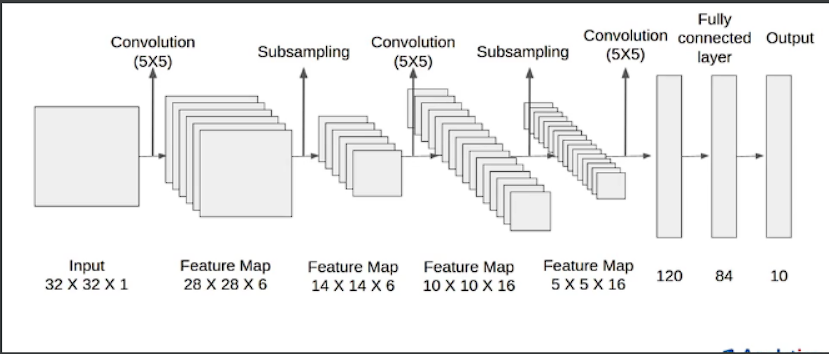

In [16]:
import torch
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        # Convolutional Layers
        self.featureExtraction = nn.Sequential(
            
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),   # <----- 1 layer
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(6, 16, kernel_size=5, stride=1),             # <----- 2 layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # ANN layers for Classification
        self.classifier = nn.Sequential(
            
            nn.Linear(16 * 5 * 5, 120),                            # <-------- 3 layer
            nn.ReLU(),
            
            nn.Linear(120, 84),                                    # <-------- 4 layer
            nn.ReLU(),
            
            nn.Linear(84, 10)                                      # <-------- 5 layer (output layer)
        )

    def forward(self, x):
        x = self.featureExtraction(x)
        x = torch.flatten(x, 1)  # <--- Flattening the tensor starting from the first dimension
        x = self.classifier(x)
        return x



In [18]:
model = LeNet5()